## Experimenting HDBSCAN Clustering

In [1]:
import hdbscan
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = np.load('clusterable_data.npy')
data.shape

(2309, 2)

In [3]:
data

array([[-0.12153499, -0.22876337],
       [-0.22093687, -0.25251088],
       [ 0.1259037 , -0.27314321],
       ...,
       [ 0.50243143, -0.3002958 ],
       [ 0.53822256,  0.19412199],
       [-0.08688887, -0.2092721 ]])

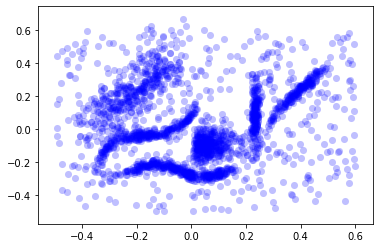

In [4]:
plt.scatter(*data.T, s=50, linewidth=0, c='b', alpha=0.25)

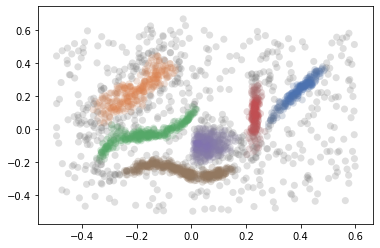

In [5]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=15).fit(data)
color_palette = sns.color_palette('deep', 8)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]
plt.scatter(*data.T, s=50, linewidth=0, c=cluster_member_colors, alpha=0.25)

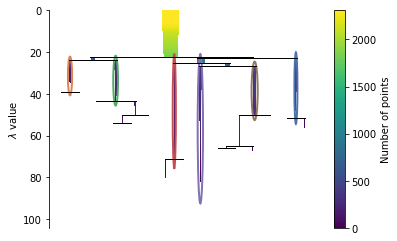

In [6]:
clusterer.condensed_tree_.plot(select_clusters=True,
                               selection_palette=sns.color_palette('deep', 8))

In [7]:
tree = clusterer.condensed_tree_.to_pandas()
tree[tree.child_size > 1]

,parent,child,lambda_val,child_size
468,2309,2310,22.149180,625
469,2309,2311,22.149180,1216
495,2311,2312,22.974381,1004
496,2311,2313,22.974381,200
560,2310,2314,23.727882,275
561,2310,2315,23.727882,316
575,2312,2316,25.366360,208
576,2312,2317,25.366360,772
631,2317,2318,26.892063,356
632,2317,2319,26.892063,406


### Selecting min_cluster_size

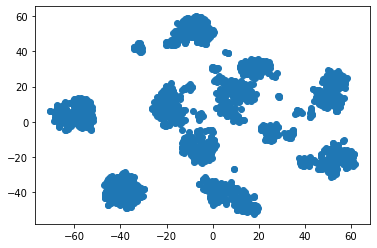

In [8]:
from sklearn import datasets
from sklearn.manifold import TSNE

digits = datasets.load_digits()
data = digits.data
projection = TSNE().fit_transform(data)
plt.scatter(*projection.T)

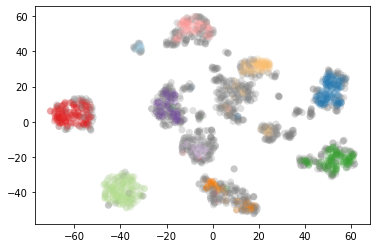

In [9]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=15).fit(data)
color_palette = sns.color_palette('Paired', 12)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]
plt.scatter(*projection.T, s=50, linewidth=0, c=cluster_member_colors, alpha=0.25)

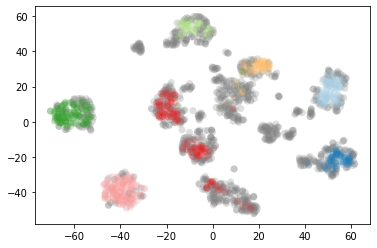

In [10]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=30).fit(data)
color_palette = sns.color_palette('Paired', 12)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]
plt.scatter(*projection.T, s=50, linewidth=0, c=cluster_member_colors, alpha=0.25)

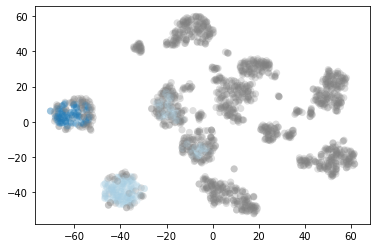

In [11]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=60).fit(data)
color_palette = sns.color_palette('Paired', 12)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]
plt.scatter(*projection.T, s=50, linewidth=0, c=cluster_member_colors, alpha=0.25)

### Selecting min_samples

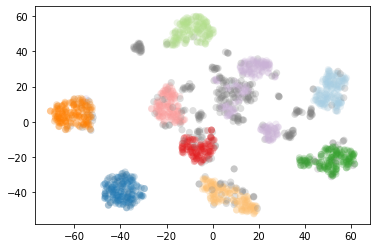

In [12]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=60, min_samples=1).fit(data)
color_palette = sns.color_palette('Paired', 12)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]
plt.scatter(*projection.T, s=50, linewidth=0, c=cluster_member_colors, alpha=0.25)

### Outliar Detection

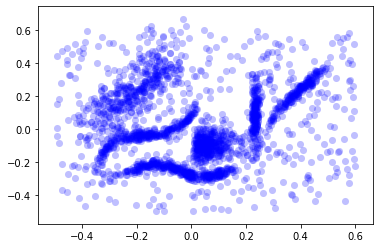

In [13]:
data = np.load('clusterable_data.npy')
plt.scatter(*data.T, s=50, linewidth=0, c='b', alpha=0.25)

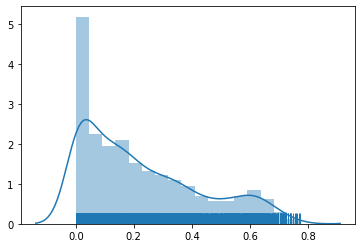

In [14]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=15).fit(data)
sns.distplot(clusterer.outlier_scores_[np.isfinite(clusterer.outlier_scores_)], rug=True)

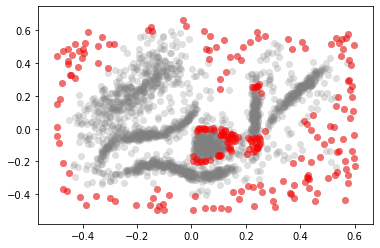

In [15]:
import pandas as pd
threshold = pd.Series(clusterer.outlier_scores_).quantile(0.9)
outliers = np.where(clusterer.outlier_scores_ > threshold)[0]
plt.scatter(*data.T, s=50, linewidth=0, c='gray', alpha=0.25)
plt.scatter(*data[outliers].T, s=50, linewidth=0, c='red', alpha=0.5)

### Predicting clusters for new points

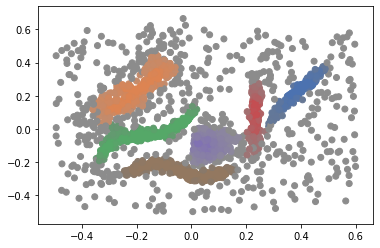

In [16]:
data = np.load('clusterable_data.npy')
clusterer = hdbscan.HDBSCAN(min_cluster_size=15, prediction_data=True).fit(data)
pal = sns.color_palette('deep', 8)
colors = [sns.desaturate(pal[col], sat) for col, sat in zip(clusterer.labels_,
                                                            clusterer.probabilities_)]
plt.scatter(data.T[0], data.T[1], c=colors);

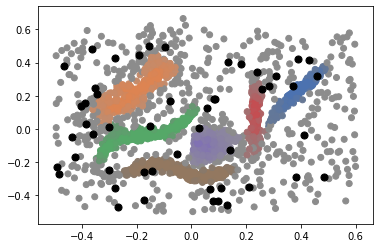

In [17]:
test_points = np.random.random(size=(50, 2)) - 0.5

colors = [sns.desaturate(pal[col], sat) for col, sat in zip(clusterer.labels_,
                                                            clusterer.probabilities_)]
plt.scatter(data.T[0], data.T[1], c=colors);
plt.scatter(*test_points.T, c='k', s=50)

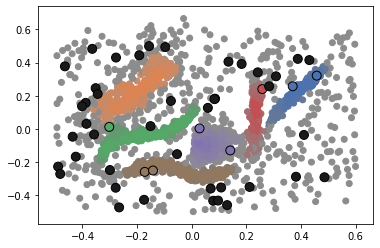

In [18]:
test_labels, strengths = hdbscan.approximate_predict(clusterer, test_points)
colors = [sns.desaturate(pal[col], sat) for col, sat in zip(clusterer.labels_,
                                                            clusterer.probabilities_)]
test_colors = [pal[col] if col >= 0 else (0.1, 0.1, 0.1) for col in test_labels]
plt.scatter(data.T[0], data.T[1], c=colors);
plt.scatter(*test_points.T, c=test_colors, s=80, linewidths=1, edgecolors='k')

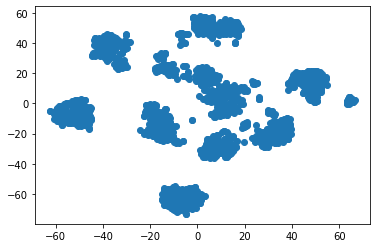

In [19]:
digits = datasets.load_digits()
data = digits.data
projection = TSNE().fit_transform(data)
plt.scatter(*projection.T,)

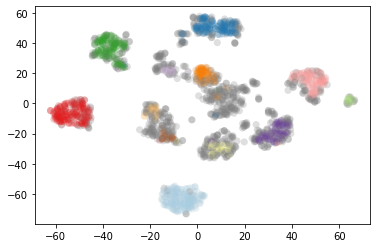

In [20]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=10, prediction_data=True).fit(data)
color_palette = sns.color_palette('Paired', 12)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]
plt.scatter(*projection.T, s=50, linewidth=0, c=cluster_member_colors, alpha=0.25)

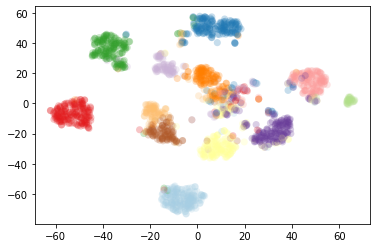

In [21]:
soft_clusters = hdbscan.all_points_membership_vectors(clusterer)
color_palette = sns.color_palette('Paired', 12)
cluster_colors = [color_palette[np.argmax(x)]
                  for x in soft_clusters]
plt.scatter(*projection.T, s=50, linewidth=0, c=cluster_colors, alpha=0.25)

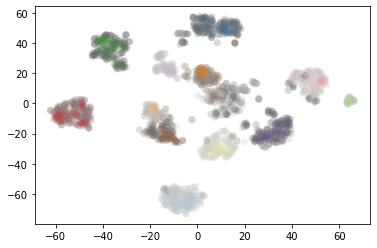

In [22]:
color_palette = sns.color_palette('Paired', 12)
cluster_colors = [sns.desaturate(color_palette[np.argmax(x)], np.max(x))
                  for x in soft_clusters]
plt.scatter(*projection.T, s=50, linewidth=0, c=cluster_colors, alpha=0.25)

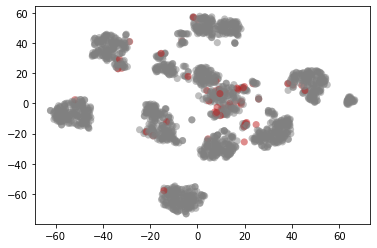

In [23]:
def top_two_probs_diff(probs):
    sorted_probs = np.sort(probs)
    return sorted_probs[-1] - sorted_probs[-2]

# Compute the differences between the top two probabilities
diffs = np.array([top_two_probs_diff(x) for x in soft_clusters])
# Select out the indices that have a small difference, and a larger total probability
mixed_points = np.where((diffs < 0.001) & (np.sum(soft_clusters, axis=1) > 0.5))[0]
colors = [(0.75, 0.1, 0.1) if x in mixed_points
          else (0.5, 0.5, 0.5) for x in range(data.shape[0])]
plt.scatter(*projection.T, s=50, linewidth=0, c=colors, alpha=0.5)

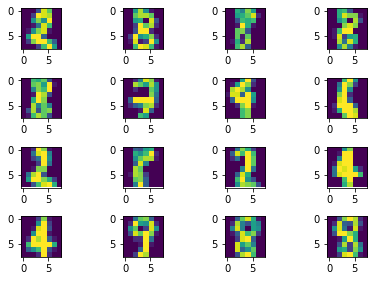

In [24]:
fig = plt.figure()
for i, image in enumerate(digits.images[mixed_points][:16]):
    ax = fig.add_subplot(4,4,i+1)
    ax.imshow(image)
plt.tight_layout()